In [2]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import json

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['svg.fonttype'] = 'none'

In [5]:
path = "../Data/Growth_data/initial_tolerance_tests/Initial_tolerance_data_frame.tsv"
df = pd.read_csv(path, sep="\t")

## Initial toxicity

/var/folders/80/k0yk5y8d0h92ybc8qhpcw3h40000gn/T/ipykernel_85542/2574487168.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_df['growth_rate']=comp_df['growth_rate']/comp_df[['growth_rate','conc']].groupby('conc').mean().max().values[0]
/var/folders/80/k0yk5y8d0h92ybc8qhpcw3h40000gn/T/ipykernel_85542/2574487168.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_df['growth_rate']=comp_df['growth_rate']/comp_df[['growth_rate','conc']].groupby('conc').mean().max().values[0]
/var/folders/80/k0yk

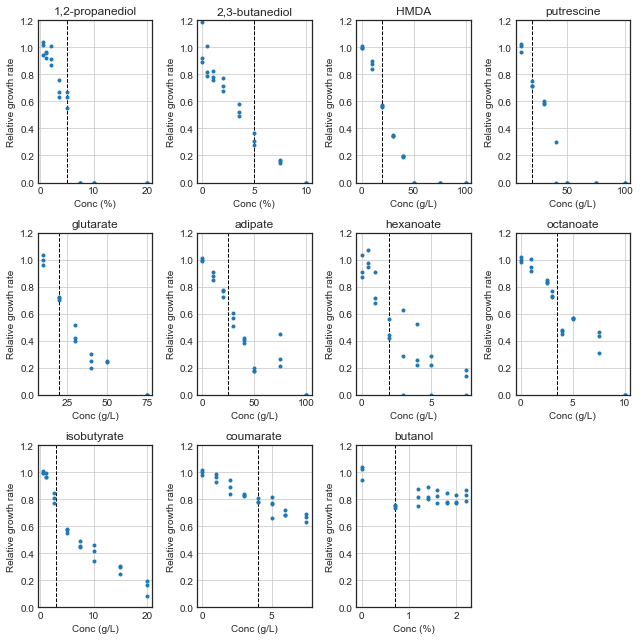

In [19]:
plt.style.use("seaborn-white")

comp_order = [
    "1,2-propanediol", "2,3-butanediol", "HMDA", "putrescine", "glutarate", "adipate", "hexanoate",
    "octanoate", "isobutyrate", "coumarate", "butanol"
]

initial_concentrations = {
    "butanol": 0.7,
    "glutarate": 20,
    "coumarate": 4,
    "putrescine": 20,
    "HMDA": 20,
    "adipate": 25,
    "isobutyrate": 3,
    "hexanoate": 2,
    "octanoate": 3.5,
    "2,3-butanediol": 5,
    "1,2-propanediol": 5
}

plt.figure(figsize=[9, 9])

for i, comp in enumerate(comp_order):
    plt.subplot(3, 4, i+1)
    comp_df = df[df["compound"] == comp]
    means = comp_df.groupby("conc").mean()["growth_rate"]
    if comp == "coumarate":
        comp_df = comp_df[comp_df["growth_rate"] > 0.4]
    if comp == "putrescine":
        comp_df = comp_df[~((comp_df["growth_rate"] > 0.45) & (comp_df["conc"] > 25))]
    if comp == "glutarate":
        comp_df = comp_df[~((comp_df["conc"] > 40) & (comp_df["growth_rate"] > 0.4))]
    stds = comp_df.groupby("conc").std()["growth_rate"]
    nums = comp_df.groupby("conc").count()["growth_rate"]
    #plt.errorbar(means.index, means.values, yerr=(stds / nums).values, fmt=".")
    max_growth = comp_df["growth_rate"].max()
    
    comp_df['growth_rate']=comp_df['growth_rate']/comp_df[['growth_rate','conc']].groupby('conc').mean().max().values[0]

#    plt.plot([initial_concentrations[comp]]*2, [0, max_growth], "k--", linewidth=1)
    plt.plot([initial_concentrations[comp]]*2, [0, 1.2], "k--", linewidth=1)

    plt.plot(comp_df["conc"], comp_df["growth_rate"], ".")
    plt.title(comp)
    plt.ylim(0,1.2)
    plt.xlabel("Conc ({})".format(comp_df["unit"].iloc[0]))
    plt.ylabel("Relative growth rate")
    plt.grid()
    
plt.tight_layout()

plt.savefig("../Plots/FigS1_init_growth.svg")

## Osmolarity plots

In [7]:
final_concentrations = {
    '12PD':1.09081351,
    '23BD':0.876599239,
    'HMDA':0.653988469,
    'PUTR':0.862166761,
    'GLUT':1.078564941,
    'ADIP':1.026413029,
    'HEXA':0.129132231,
    'OCTA':0.138686638,
    'COUM':0.243664717,
    'IBUA':0.286993457,
    'BUT':0.218623482
}

In [8]:
final_concentrations.get

<function dict.get(key, default=None, /)>

In [9]:
glob_tol = pd.read_csv("../Data/Global_tolerance_dataframe.csv")
glob_tol["osmolarity"] = glob_tol["comp"].map(final_concentrations.get)

In [10]:
glob_tol

,strain,"1,2-propanediol","2,3-butanediol",HMDA,putrescine,glutarate,adipate,hexanoate,octanoate,coumarate,isobutyrate,butanol,NaCl,M9,global,comp,osmolarity
0,12PD1-10,0.351151,0.346805,-0.225612,-0.278704,0.072742,0.053331,0.137964,-0.255672,NaN,0.070423,-0.470725,-0.116994,0.186647,-0.047162,12PD,1.090814
1,12PD1-2,0.423014,0.392368,-0.225612,-0.278704,0.036386,0.082049,0.215836,-0.039191,NaN,0.081754,0.315779,-0.116994,0.249728,0.109413,12PD,1.090814
2,12PD1-4,0.384709,0.359652,-0.225612,-0.278704,0.072007,0.048369,0.294052,-0.255672,NaN,-0.318141,-0.470725,-0.116994,0.273073,-0.092584,12PD,1.090814
3,12PD2-5,0.396872,0.356981,-0.225612,-0.278704,0.043707,0.148187,-0.220543,-0.255672,NaN,-0.207516,-0.470725,-0.116994,0.206442,-0.113005,12PD,1.090814
4,12PD2-8,0.298306,0.337089,-0.225612,-0.278704,0.028266,0.104202,0.109715,-0.255672,NaN,-0.318141,-0.470725,-0.116994,0.059591,-0.111763,12PD,1.090814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,BUT8-5,0.003099,-0.080091,-0.005557,-0.243704,-0.172632,-0.126229,-0.119295,-0.363160,-0.329627,-0.194993,0.116902,-0.021202,0.142433,-0.143299,BUT,0.218623
277,BUT8-7,0.018573,-0.057411,-0.058553,-0.243704,-0.172632,-0.137612,-0.118760,-0.363160,-0.236841,-0.184232,0.101881,0.039937,0.126481,-0.131973,BUT,0.218623
278,BUT9-10,0.067567,0.075487,0.139659,0.099702,0.036836,0.040247,0.054561,-0.136810,0.127018,0.130493,0.137528,0.079780,0.153168,0.083946,BUT,0.218623
279,BUT9-5,0.016099,0.036504,0.148936,0.038600,-0.014481,-0.044068,-0.067817,0.033499,0.127363,-0.051098,0.097844,0.132517,0.155970,0.036850,BUT,0.218623


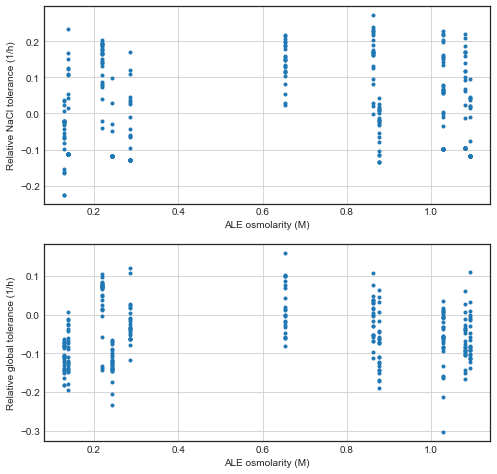

In [11]:
plt.figure(figsize=[8, 8])
plt.subplot(2, 1, 1)
plt.plot(glob_tol["osmolarity"], glob_tol["NaCl"], ".")
plt.xlabel("ALE osmolarity (M)")
plt.ylabel("Relative NaCl tolerance (1/h)")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(glob_tol["osmolarity"], glob_tol["global"], ".")
plt.xlabel("ALE osmolarity (M)")
plt.ylabel("Relative global tolerance (1/h)")
plt.grid()

plt.savefig("../Plots/Osmolarity-figure.pdf")